In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.layers import Input, Dense
from keras.models import Model, load_model
from keras.utils import plot_model

def plot1Dhisto (Tr1, Tr2, name, Min, Max) :
  fig2 = plt.figure(figsize=(4,4))
  plt.hist(Tr1,  bins=100, density=False, histtype="step", linewidth=2, linestyle="solid",  edgecolor="orange",   label="B")
  plt.hist(Tr2,  bins=100, density=False, histtype="step", linewidth=2, linestyle="solid",  edgecolor="blue", label="R")
  plt.legend(loc=9)
  plt.xlim(Min, Max)
  plt.xlabel(name)
  plt.ylabel("Events")
  fig2.savefig(name+".png")
  plt.show()
    
def plot2Dhisto (x1, y1, x2, y2, name) :
  fig2 = plt.figure(figsize=(4,4))
  plt.scatter(x2, y2, s=5, alpha=0.5)
  plt.scatter(x1, y1, s=5, alpha=0.5)
  plt.ylabel("Body index")
  plt.xlabel("Height")
  fig2.savefig(name+"2D.png")
  plt.show()







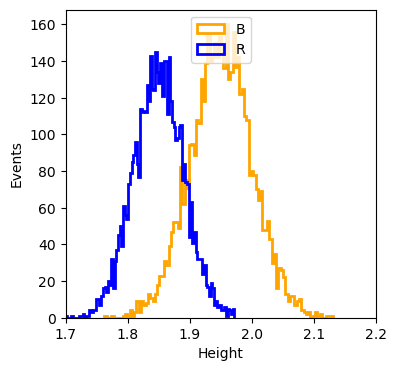

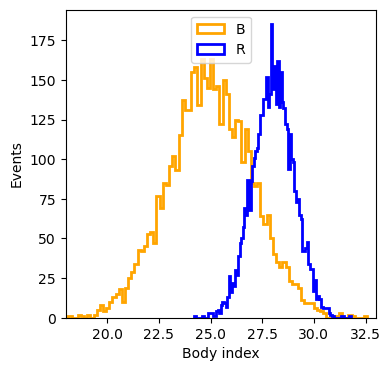

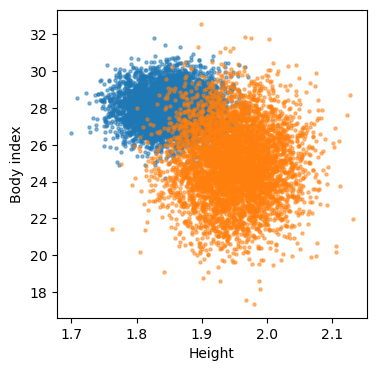

In [32]:
B_v1 = np.random.normal(1.95, 0.05, 5000)                  # generate data 
B_v2 = np.random.normal(25, 2, 5000)
    
R_v1 = np.random.normal(1.85, 0.04, 5000)
R_v2 = np.random.normal(28, 1, 5000)

plot1Dhisto (B_v1, R_v1, "Height", 1.70, 2.20)               # plot distributions
plot1Dhisto (B_v2, R_v2, "Body index", 18, 33)    
plot2Dhisto (B_v1, B_v2, R_v1, R_v2, "var12")

B_vars = np.column_stack((B_v1, B_v2))                      # merge 1D arrays to 2D
R_vars = np.column_stack((R_v1, R_v2))
   
B_L = np.ones((B_vars.shape[0]),dtype='f')                 #apply class labels 
R_L = np.zeros((R_vars.shape[0]),dtype='f')
    
RB_L = np.concatenate((B_L,R_L))                           #merge 2 classes data 
RB_vars = np.concatenate((B_vars,R_vars))
    
scaler = RobustScaler()                                    #Scale the range of the training variables
RB_vars = scaler.fit_transform(RB_vars)

##plot2Dhisto (RB_vars[0], RB_vars, R_v1, R_v2, "Sc_var12")
    
RB_vars, RB_L = shuffle(RB_vars, RB_L)   # suffle data 

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/30
100/100 [==============================] - 2s 9ms/step - loss: 0.6797 - accuracy: 0.6320 - val_loss: 0.6284 - val_accuracy: 0.7600
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5450 - accuracy: 0.8530 - val_loss: 0.4441 - val_accuracy: 0.9140
Epoch 3/30
100/100 [==============================] - 1s 8ms/step - loss: 0.3546 - accuracy: 0.9298 - val_loss: 0.2829 - val_accuracy: 0.9312
Epoch 4/30
100/100 [==============================] - 1s 9ms/step - loss: 0.2349 - accuracy: 0.9350 - val_loss: 0.2108 - val_accuracy: 0.9332
Epoch 5/30
100/100 [==============================] - 1s 8ms/step - loss: 0.1868 - accuracy: 0.9364 - val_loss: 0.1857 - val_accuracy: 0.9326
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.1691 - accuracy: 0.9364 - val_loss: 0.1771 - val_accuracy: 0.9336

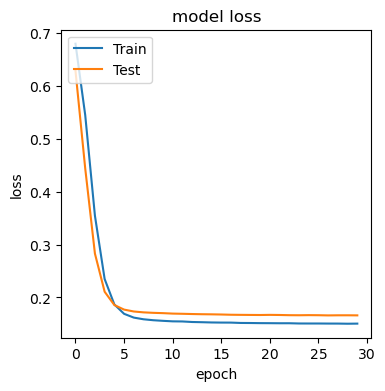

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_18 (Dense)            (None, 5)                 15        
                                                                 
 dense_19 (Dense)            (None, 5)                 30        
                                                                 
 dense_20 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [33]:
          
L1 = Input(shape=(2,))                               # define NN architecture 
L2 = Dense(5, activation='relu')(L1)
L3 = Dense(5, activation='relu')(L2)                                              
L4 = Dense(1,  activation='sigmoid')(L3)    
    
mlp = Model(inputs=L1, outputs=L4)                   # Define input and output layer
    
plot_model(mlp, to_file="NN_Ar2.png", show_shapes=True)    # plot NN architecture
            
mlp.compile(loss='binary_crossentropy', optimizer="Adam", metrics=['accuracy'])       #  compile model - define loss function and loss minimizer
      
hist=mlp.fit(RB_vars, RB_L, validation_split = 0.5, epochs=30, batch_size=50,verbose=1)     # Train the model - Define training/test data, epochs, batch size 
    
fig= plt.figure(figsize=(4,4))                                  #Training curves plot
plt.plot(hist.history['loss'],label='Train')
plt.plot(hist.history['val_loss'], label='Test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch') 
plt.legend(loc='upper left')
fig.savefig("Training_curve.png")
plt.show()
    
mlp.summary()                             # print mlp summary 
mlp.save("NN.h5")                          # save model
   

313/313 [==============================] - 1s 4ms/step


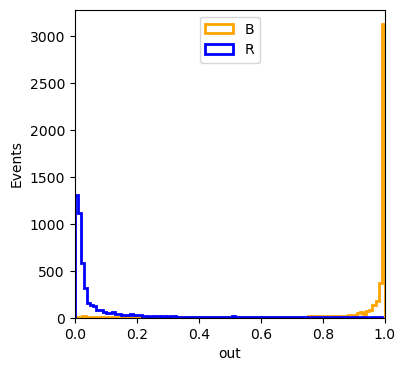

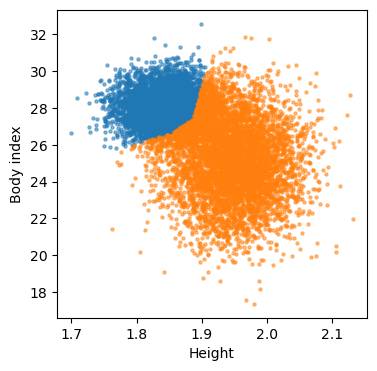

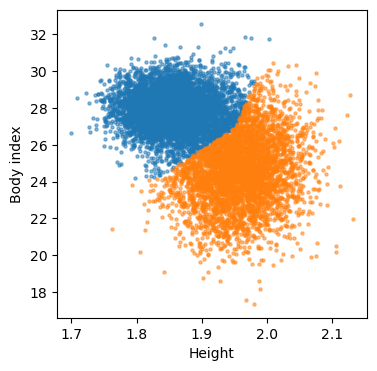

In [34]:
mlp = load_model("NN.h5")
P=mlp.predict(RB_vars, verbose=1) 
    
PB = P[RB_L==1]                                                 # separate rugby basketball to validate NN performance
PR = P[RB_L==0]
     
plot1Dhisto (PB, PR, "out", 0, 1)                             # plot NN output distribution                       
    
RB_vars = scaler.inverse_transform(RB_vars)                  # Inverse the scaling to plot NN predictions 
    
PB_vars = RB_vars[P[:,0]>0.1]                            # decision at 0.2
PR_vars = RB_vars[P[:,0]<0.1]    
  
plot2Dhisto (PB_vars[:, 0], PB_vars[:, 1], PR_vars[:, 0], PR_vars[:, 1], "var12_02")

PB_vars = RB_vars[P[:,0]>0.5]                               # decision at 0.5
PR_vars = RB_vars[P[:,0]<0.5]    
  
plot2Dhisto (PB_vars[:, 0], PB_vars[:, 1], PR_vars[:, 0], PR_vars[:, 1], "var12_05")
    
PB_vars = RB_vars[P[:,0]>0.9]                                        # decision at 0.8
PR_vars = RB_vars[P[:,0]<0.9]    
  
plot2Dhisto (PB_vars[:, 0], PB_vars[:, 1], PR_vars[:, 0], PR_vars[:, 1], "var12_08")